# 安装MMPose并对一张图进行姿势识别

## 活动任务

掌握MMEdu的pose模块的推理代码；

理解姿势识别技术。
## 活动步骤

### 1 安装MMPose
输入pip安装命令：

注：运行完以下命令后请重启内核，重启后无需再次运行该命令

In [ ]:
!pip install mmpose==0.23.0 -i https://pypi.tuna.tsinghua.edu.cn/simple/
!pip install numpy==1.23.0

温馨提示：本地版安装需在Jupyter里返回根目录，打开MMEdu下的__init__.py，将pose相关代码取消注释。ctrl+s保存。

### 2 准备图片
在网上查找或者手机拍照，准备一张带有人体姿势的图片，放在demo文件夹下。

例如我从网上下载了一张图片，1.jpg放在了项目文件。

- 也可以直接用电脑摄像头拍照，由于平台只支持调用服务器摄像头，和本地直接调用摄像头有区别，建议大家在本地运行下面这段代码，给自己拍张照吧，记得摆一个pose哦。

### 3 对一张图片进行姿势识别
指定图片路径，然后进行姿势推理。

F:\JupyterNotebookWorkshop\mmproject\MMEdu\models\SCNet\SCNet.pth
========= begin inference ==========
load checkpoint from local path: F:\JupyterNotebookWorkshop\mmproject\MMEdu\models\SCNet\SCNet.pth
load checkpoint from local path: F:\JupyterNotebookWorkshop\mmproject\MMEdu\models\FasterRCNN-pose\FasterRCNN-pose.pth


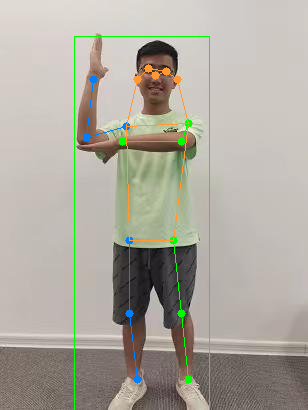

[{'bbox': array([ 74.88486 ,  36.390327, 209.68152 , 410.      ,   0.999551],
      dtype=float32), 'keypoints': array([[155.58723   ,  75.53412   ,   0.9823346 ],
       [166.56212   ,  71.87579   ,   0.9784033 ],
       [148.27061   ,  68.21753   ,   0.9815805 ],
       [177.53703   ,  79.19241   ,   0.9288834 ],
       [137.29576   ,  79.19241   ,   0.9481994 ],
       [188.51189   , 123.09198   ,   0.87962466],
       [126.32085   , 126.750275  ,   0.8760694 ],
       [181.1953    , 141.38348   ,   0.9316059 ],
       [ 86.079575  , 137.72516   ,   0.9553601 ],
       [122.66255   , 141.38348   ,   0.9661562 ],
       [ 93.396164  ,  79.19241   ,   0.8833958 ],
       [173.87871   , 240.1575    ,   0.8173657 ],
       [129.97914   , 240.1575    ,   0.8349153 ],
       [181.1953    , 313.32343   ,   0.9021521 ],
       [129.97914   , 313.32343   ,   0.8840277 ],
       [188.51189   , 379.1728    ,   0.9248924 ],
       [137.29576   , 379.1728    ,   0.9279566 ]], dtype=float32)}]


In [2]:
from MMEdu import MMPose # 导入mmpose模块
import shutil
img = '1.jpg' # 指定进行推理的图片路径
model = MMPose(backbone='SCNet') # 实例化mmpose模型
result = model.inference(img=img,device='cpu',show=False) # 在CPU上进行推理
print(result)

### 解读result

In [ ]:
len(result)

In [ ]:
import numpy as np
for index,people in enumerate(result):
    print('********',index,'*******')
    print(people)

In [ ]:
result[0]['bbox']

In [ ]:
result[0]['keypoints']

In [ ]:
import numpy as np
for index,people in enumerate(result):
    print(index)
    keypoints = np.round(people['keypoints'][:, :], 10)
    print(keypoints)
    bbox = np.round(people['bbox'][:], 10)
    print(bbox)

In [ ]:
result_list = []
for index,people in enumerate(result):
    keypoints = people['keypoints'][:, :].tolist()
    bbox = people['bbox'][:].tolist()
    result_list += [{"bbox": bbox, "keypoints": keypoints}]
    print(result_list)

In [5]:
from MMEdu import MMPose # 导入mmpose模块
import shutil
import os
import json
import multiprocessing

model = MMPose(backbone='SCNet') # 实例化mmpose模型
pose_model, det_model = model.init_model(device="cpu")

origin_list = os.listdir("./imgs/origin/1")
finish_list = os.listdir("./imgs/output/1")
for finish_file in finish_list:
    if ".json" in finish_file:
        continue
    else:
        origin_list.remove(finish_file)

def img_process(img_name):
    output_path = "./imgs/output/1/"
    img_path = f"./imgs/origin/1/{img_name}"
    result = model.inference(img=img_path, device='cpu', show=False, pose_model=pose_model, det_model=det_model) # 在CPU上进行推理
    shutil.move("./pose_result.png", output_path)
    os.rename("./imgs/output/1/pose_result.png", f"./imgs/output/1/{img_name}")
    result_list = []
    for index,people in enumerate(result):
        keypoints = people['keypoints'][:, :].tolist()
        bbox = people['bbox'][:].tolist()
        result_list += [{"bbox": bbox, "keypoints": keypoints}]
    with open(f"./imgs/output/1/{img_name}".replace(".png", ".json"), "w", encoding="utf-8") as f:
        json.dump(result_list, fp=f, indent=2, ensure_ascii=False)

def img_process(total, this):
    for idx, file in enumerate(origin_list):
        if os.path.isdir(f"./imgs/origin/1/{file}"):
            continue
        else:
            if idx % total == this:
                img_process(file)
            else:
                continue
                
process_pool = []
total_process = 6
for prc_num in range(total_process):
    this_process = multiprocessing.Process(target=img_process, kwargs={"total": total_process, "this": prc_num+1})
    this_process.start()
    process_pool.append(this_process)
for this_process in process_pool:
    this_process.join()
    
print("执行结束")

F:\JupyterNotebookWorkshop\mmproject\MMEdu\models\SCNet\SCNet.pth
load checkpoint from local path: F:\JupyterNotebookWorkshop\mmproject\MMEdu\models\SCNet\SCNet.pth
load checkpoint from local path: F:\JupyterNotebookWorkshop\mmproject\MMEdu\models\FasterRCNN-pose\FasterRCNN-pose.pth
执行结束


In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import os
import threading

def video_to_frames(video_path, outPutDirName):
    times = 0
    
    # 提取视频的频率，每1帧提取一个
    frame_frequency = 1
    
    # 如果文件目录不存在则创建目录
    if not os.path.exists(outPutDirName):
        os.makedirs(outPutDirName)
        
    # 读取视频帧
    camera = cv2.VideoCapture(video_path)
    
    while True:
        times = times + 1
        res, image = camera.read()
        if not res:
            print('not res , not image')
            break
        if times % frame_frequency == 0:
            cv2.imwrite(outPutDirName + '/' + str(times)+'.png', image)
            
    print('图片提取结束')
    camera.release()

if __name__ == "__main__":
    input_dir = './video/'       # 输入的video文件夹位置
    save_dir = './imgs/origin/'         # 输出图片到当前目录video文件夹下
    count = 0   # 视频数
    for video_name in os.listdir(input_dir):
        video_path = os.path.join(input_dir, video_name)
        outPutDirName = os.path.join(save_dir, video_name[:-4])
        threading.Thread(target=video_to_frames, args=(video_path, outPutDirName)).start()
        count = count + 1
        print("%s th video has been finished!" % count)

In [ ]:
threading.enumerate()

In [ ]:
len(os.listdir("./imgs/origin/1/"))

In [1]:
import json
import os

os.chdir("./imgs/")
num = int(len(os.listdir("./output/1/"))/2)
list_output = []
files = [f"{i+1}.json" for i in range(num)]

for file in files:
    with open("./output/1/"+file, "r", encoding="utf-8") as f:
        data = json.load(f)
    add_dict = {
        "index" : int(file.replace(".json", "")),
        "data" : data,
        }
    list_output.append(add_dict)

with open("result_list.json", "w", encoding="utf-8") as f:
    json.dump(list_output, fp=f, indent=2)


In [6]:
import os
import json

# os.chdir("../")
with open("./imgs/result_list.json", "r", encoding="utf-8") as f:
    lis = json.load(f)
    
all_frame = len(lis)


In [ ]:
# 单帧提取

tags = ["鼻子", "左眼", "右眼", "左耳", "右耳", "左肩", "右肩", "左肘", "右肘", "左手", "右手", "左臀", "右臀", "左膝", "右膝", "左脚", "右脚"]

while True:
    k = int(input(f"frame(1-{all_frame}): "))
    # print(json.dumps(lis[k-1], indent=2))
    this_data = lis[k-1]
    for pe_num, person in enumerate(this_data["data"]):
        print("person", pe_num)
        ux, uy, dx, dy, score = (tuple(person["bbox"]))
        center_x = (ux+uy)/2
        center_y = (dx+dy)/2
        print("center: x:", center_x, "y:", center_y)
        keypoints = person["keypoints"]
        for idx, values in enumerate(zip(keypoints, tags)):
            point, tag = values
            point_x, point_y, point_score = tuple(point)
            # score作为区分依据，可更改看效果
            if score >= 0.6:
                print(idx+1, ".", tag, "x:", point_x, "y:", point_y)
            else:
                print(idx+1, ".", tag, "(置信度低)x:", point_x, "y:", point_y)

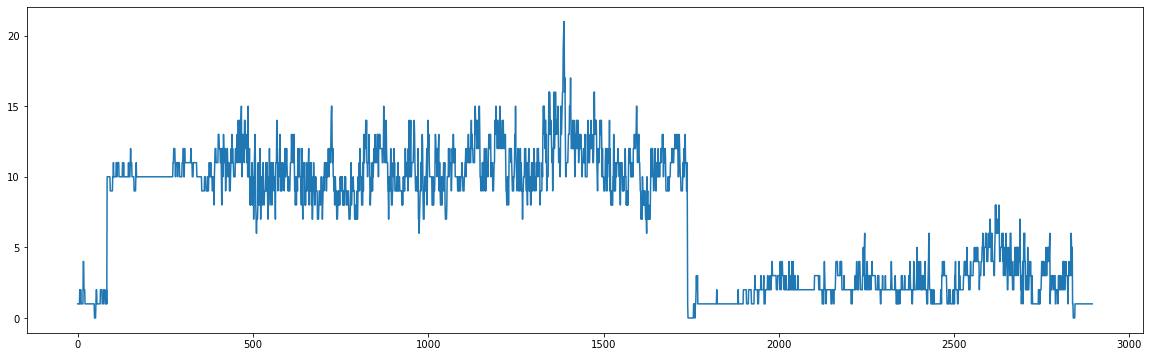

divide: [84, 1740]


In [29]:
import matplotlib.pyplot as plt
# 场景分割
counter = []

for frame in lis:
    num = len(frame["data"])
    counter.append(num)
    
plt.figure(figsize=(20, 6)) 
plt.plot(counter)
plt.show()

cut_point = []
last = 1
for idx, frame in enumerate(counter):
    if abs(frame-last) < 6:
        last = frame
        continue
    else:
        last = frame
        cut_point.append(idx)
print("divide:", cut_point)

In [ ]:
# 锁定人物
# 由于人物在连续拍摄情况下每一帧center变化和size变化都不大，初定差值 20px 和 7% 抖动
# 
# 初定数据格式: people: [id, [[frame, [bbox: list, keypoint: list]], ...], ...]
# sense则由people数组组成
# 对于记录的frame，人物如果在next后未出现，则视为消失，再次出现时凭借新id，再记录frame


# tags = ["鼻子", "左眼", "右眼", "左耳", "右耳", "左肩", "右肩", "左肘", "右肘", "左手", "右手", "左臀", "右臀", "左膝", "右膝", "左脚", "右脚"]
# 根据稳定性会将`鼻子", "左眼", "右眼"`排除在外，又由于本项目人体移动特征不是很大，故采用`"左肩", "右肩", "左臀", "右臀"`进行精确判断
# config:
delta_center = 10    # 废弃
delta_size_rate = 0.5    # 废弃
keypoint_num = 8    # total = 17
keypoint_body_px = 10
keypoint_other_px = 40

# 单场景下的记录器
people = []

# 场景记录器
sense = []
cut_point.append(counter[-1])

start = 0
for divide_point in cut_point:
    # 初始化
    people = []
    total_id = 0
    # 单帧分析
    sence_frame_list = lis[start:divide_point]
    last_frame_people = []    # id表示
    for idx, frame in enumerate(sence_frame_list):
        global_frame = frame["index"]
        data = frame["data"]
        this_frame_people = []
        # 提取上一帧任然有效的人物
        for pe_index, person in enumerate(people):
            if person[0] in last_frame_people:
                # 由于边框检测的抖动过大，所以采用骨骼点进行判断
                keypoints = person[1][-1][1]["keypoints"]
                # 提取准确点
                body = keypoints[3:7] + keypoints[11:13]
                hands = keypoints[7:11]
                legs = keypoints[13:]
                max_pass_point_count = keypoint_num
                best_judge_person_data = None
                for judge_person in data:
                    body_check_pass_point_count = 0
                    other_check_pass_point_count = 0
                    this_keypoints = judge_person["keypoints"]
                    this_body = this_keypoints[3:7] + this_keypoints[11:13]
                    this_hands = this_keypoints[7:11]
                    this_legs = this_keypoints[13:]
                    for this_bodypoints, last_bodypoints in zip(this_body, body):
                        if abs(this_bodypoints[0]-last_bodypoints[0]) < keypoint_body_px and abs(this_bodypoints[1]-last_bodypoints[1]) < keypoint_body_px:
                            body_check_pass_point_count += 1
                    for this_otherpoints, last_otherpoints in zip(this_hands+this_legs, hands+legs):
                        if abs(this_otherpoints[0]-last_otherpoints[0]) < keypoint_other_px and abs(this_otherpoints[1]-last_otherpoints[1]) < keypoint_other_px:
                            other_check_pass_point_count += 1
                    # print(body_check_pass_point_count*2 + other_check_pass_point_count)
                    if body_check_pass_point_count*2 + other_check_pass_point_count > max_pass_point_count:
                        max_pass_point_count = body_check_pass_point_count*2 + other_check_pass_point_count
                        best_judge_person_data = judge_person
                # print(best_judge_person_data)
                if best_judge_person_data:
                    data.remove(best_judge_person_data)
                    people[pe_index][1].append([global_frame, best_judge_person_data])
                    this_frame_people.append(person[0])
#                 # 提取上一次中心
#                 # print(person)
#                 last_center_x = (person[1][-1][1]["bbox"][0]+person[1][-1][1]["bbox"][2])/2
#                 last_center_y = (person[1][-1][1]["bbox"][1]+person[1][-1][1]["bbox"][3])/2
#                 bbox_left_border, bbox_up_border, bbox_right_border, bbox_down_border, score = tuple(person[1][-1][1]["bbox"])
#                 delta_min_data = None
#                 delta_x = 1280
#                 delta_y = 720
#                 for this_person in data:
#                     this_center_x = (this_person["bbox"][0]+this_person["bbox"][2])/2
#                     this_center_y = (this_person["bbox"][1]+this_person["bbox"][3])/2
#                     this_bbox_left_border, this_bbox_up_border, this_bbox_right_border, this_bbox_down_border, score = tuple(this_person["bbox"])
#                     # 距离判断，是否变近
#                     if (abs(last_center_x-this_center_x)**2+abs(last_center_y-this_center_y)**2) < delta_x**2+delta_y**2:
#                         delta_x = abs(last_center_x-this_center_x)
#                         delta_y = abs(last_center_y-this_center_y)
#                         delta_min_data = data
#                     else:
#                         continue
#                 # 所有条件全部加上，判断是否为同一个人
#                 # border_condition = (abs(bbox_up_border-this_bbox_up_border)/(bbox_down_border-bbox_up_border) <= delta_size_rate and abs(bbox_down_border-this_bbox_up_border)/(bbox_up_border-bbox_down_border) <= delta_size_rate and abs(bbox_left_border-this_bbox_left_border)/(bbox_right_border-bbox_left_border) <= delta_size_rate and abs(bbox_right_border-this_bbox_right_border)/(bbox_right_border-bbox_left_border) <= delta_size_rate)
#                 if delta_x <= delta_center and delta_y <= delta_center:
#                     data.remove(this_person)
#                     people[pe_index][1].append([global_frame, this_person])
#                     this_frame_people.append(person[0])
        for new_person in data:
            total_id += 1
            people.append([total_id, []])
            for idx, person in enumerate(people):
                if person[0] == total_id:
                    people[idx][1].append([global_frame, new_person])
            this_frame_people.append(total_id) 
        # print(this_frame_people)
        last_frame_people = this_frame_people
    start = divide_point+1
    sense.append(people)

In [ ]:
len(sense[1])

In [ ]:
max_len = 0
pe_id = None
for people in sense[1]:
    if len(people[1]) > max_len:
        max_len = len(people[1])
        pe_id = people[0]
print(max_len, pe_id)